In [1]:
# HR Analytics

In [2]:
# Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt

In [3]:
# Current directory

os.getcwd()

'C:\\Users\\johnp\\Documents\\Python Scripts'

In [4]:
# Load Datasets

employeedf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\employee_survey_data.csv')
generaldf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\general_data.csv')
intimedf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\in_time.csv')
outtimedf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\out_time.csv')
managerdf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\manager_survey_data.csv')

In [5]:
# Viewing Data

In [6]:
# Employee Table
employeedf.head(3)

# Setting index
employeedf.set_index(['EmployeeID'], inplace = True)
employeedf.fillna(2, inplace = True)


# Changing Values in Categ Columns
employeedf['EnvironmentSatisfaction'].replace((1,2,3,4), ['low', 'medium', 'high', 'very high'], inplace = True)
employeedf['JobSatisfaction'].replace((1,2,3,4), ['low', 'medium', 'high', 'very high'], inplace = True)
employeedf['WorkLifeBalance'].replace((1,2,3,4), ['bad', 'good', 'better', 'best'], inplace = True)

employeedf.head(2)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
1,high,very high,good
2,high,medium,best


In [7]:
# Changing Column Type
employeedf['EnvironmentSatisfaction'] = employeedf['EnvironmentSatisfaction'].astype('category')
employeedf['JobSatisfaction'] = employeedf['JobSatisfaction'].astype('category')
employeedf['WorkLifeBalance'] = employeedf['WorkLifeBalance'].astype('category')

In [8]:
employeedf.dtypes

EnvironmentSatisfaction    category
JobSatisfaction            category
WorkLifeBalance            category
dtype: object

In [7]:
# General Table

# Reloading Table
generaldf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\general_data.csv')

# Table
generaldf.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


In [8]:
# Setting the general table index

generaldf.set_index(['EmployeeID'], inplace = True)

In [10]:
# Changing All object datatypes to categories
generaldf.iloc[:,[2,3,5,6,9,10,11,12,15,18]] = generaldf.iloc[:,[2,3,5,6,9,10,11,12,15,18]].astype('category')

# Changing Response Variable col to categeorial by changing no and yes to 0 and 1

generaldf['Attrition'].replace(['Yes', 'No'],[1,0], inplace = True)
generaldf['Attrition'] = generaldf['Attrition'].astype('category')

# Changing Education column to values
generaldf['Education'].replace([1,2,3,4,5], ['Below College', 'College', 'Bachelor', 'Masters', 'Doctor'], inplace = True)
generaldf['Education'] = generaldf['Education'].astype('category')
generaldf['Gender'] = generaldf['Gender'].astype('category')
generaldf['Over18'] = generaldf['Over18'].astype('category')
generaldf['TotalWorkingYears'] = generaldf['TotalWorkingYears'].astype('category')
generaldf['TotalWorkingYears'].fillna(0, inplace = True)
generaldf['NumCompaniesWorked'].fillna(0, inplace = True)
generaldf.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,0,Travel_Rarely,Sales,6,College,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,1,Travel_Frequently,Research & Development,10,Below College,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,0,Travel_Frequently,Research & Development,17,Masters,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3


In [11]:
generaldf.dtypes
#generaldf.head(3)

Age                           int64
Attrition                  category
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                  category
EducationField             category
EmployeeCount                 int64
Gender                     category
JobLevel                   category
JobRole                    category
MaritalStatus              category
MonthlyIncome              category
NumCompaniesWorked          float64
Over18                     category
PercentSalaryHike          category
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears          category
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
dtype: object

In [12]:
# In Time Table

# Load intime table
intimedf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\in_time.csv', dtype=object)

intimedf.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39


In [14]:
intimedf.set_index(['Unnamed: 0'], inplace = True)

intimedf.rename_axis('EmployeeID', inplace = True)

In [15]:
# Change nan to 0
intimedf.replace(np.nan,0,inplace=True)

In [16]:
intimedf.head(3)

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,0,...,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,0,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,0,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,0,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,0,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,0,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,0,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39


In [17]:
# chage to date time

intimedf.iloc[:,:] = pd.to_datetime(intimedf.iloc[:,:].stack()).unstack()

In [18]:
intimedf.dtypes

2015-01-01    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
2015-01-07    datetime64[ns]
2015-01-08    datetime64[ns]
2015-01-09    datetime64[ns]
2015-01-12    datetime64[ns]
2015-01-13    datetime64[ns]
2015-01-14    datetime64[ns]
2015-01-15    datetime64[ns]
2015-01-16    datetime64[ns]
2015-01-19    datetime64[ns]
2015-01-20    datetime64[ns]
2015-01-21    datetime64[ns]
2015-01-22    datetime64[ns]
2015-01-23    datetime64[ns]
2015-01-26    datetime64[ns]
2015-01-27    datetime64[ns]
2015-01-28    datetime64[ns]
2015-01-29    datetime64[ns]
2015-01-30    datetime64[ns]
2015-02-02    datetime64[ns]
2015-02-03    datetime64[ns]
2015-02-04    datetime64[ns]
2015-02-05    datetime64[ns]
2015-02-06    datetime64[ns]
2015-02-09    datetime64[ns]
2015-02-10    datetime64[ns]
2015-02-11    datetime64[ns]
                   ...      
2015-11-20    datetime64[ns]
2015-11-23    datetime64[ns]
2015-11-24    datetime64[ns]
2015-11-25    

In [19]:
# Out Time Table
outtimedf.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50


In [20]:
outtimedf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\out_time.csv', dtype = object)

In [21]:
outtimedf.set_index(['Unnamed: 0'], inplace = True)

In [22]:
outtimedf.rename_axis('EmployeeID', inplace = True)

In [23]:
# Change nan to 0
outtimedf.replace(np.nan,0,inplace=True)

In [24]:
outtimedf.head(3)

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,0,...,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,0,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,0,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,0,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,0,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,0,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,0,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50


In [25]:
# chage to date time

outtimedf.iloc[:,:] = pd.to_datetime(outtimedf.iloc[:,:].stack()).unstack()

In [26]:
#outtimedf.dtypes
#intimedf.dtypes

In [27]:
# create new df to calc hours throughout year

workdayhoursdf = (outtimedf.iloc[:,:] - intimedf.iloc[:,:])

In [28]:
# Convert the table to hours

workdayhoursdf = workdayhoursdf.astype('timedelta64[h]')

In [29]:
# Add total hours worked in a year column

workdayhoursdf['sumofyearhours'] = workdayhoursdf.sum(axis = 1)

In [30]:
workdayhoursdf.iloc[[23]]

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,sumofyearhours
EmployeeID,,,,,,,,,,,,,,,,,,,,,
24,0.0,6.0,6.0,6.0,7.0,6.0,0.0,6.0,7.0,0.0,...,7.0,7.0,7.0,6.0,0.0,7.0,7.0,6.0,7.0,1523.0


In [31]:
workdayhoursdf =  pd.DataFrame(workdayhoursdf)

In [32]:
totalhours = workdayhoursdf.iloc[:,-1]

In [33]:
workdayhoursdf.shape

(4410, 262)

In [34]:
# Manager Table
managerdf = pd.read_csv(r'C:\Users\johnp\Downloads\Datasets\hr-analytics-case-study\manager_survey_data.csv')

In [35]:
managerdf.set_index(['EmployeeID'], inplace = True)

In [36]:
managerdf['JobInvolvement'].replace((1,2,3,4), ['low', 'medium', 'high', 'very high'], inplace = True)
managerdf['PerformanceRating'].replace((1,2,3,4), ['low', 'good', 'excellent', 'outstanding'], inplace = True)

In [37]:
managerdf = managerdf.astype('category')
managerdf.dtypes

JobInvolvement       category
PerformanceRating    category
dtype: object

In [38]:
managerdf.head(3)

,JobInvolvement,PerformanceRating
EmployeeID,,
1,high,excellent
2,medium,outstanding
3,high,excellent


In [39]:
workdayhoursdf.head(3)

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,sumofyearhours
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.0,...,7.0,7.0,6.0,7.0,0.0,7.0,7.0,7.0,7.0,1602.0
2,0.0,8.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0,0.0,...,7.0,7.0,7.0,0.0,0.0,7.0,7.0,7.0,8.0,1691.0
3,0.0,6.0,7.0,6.0,6.0,7.0,6.0,7.0,6.0,0.0,...,7.0,6.0,6.0,6.0,0.0,7.0,7.0,7.0,6.0,1569.0


In [40]:
wdhdf = workdayhoursdf.iloc[:,-1]

In [41]:
wdhdf1 =  pd.DataFrame(wdhdf)

In [42]:
# Merging Dataframes

In [43]:
# Merging general and employeedf to one

genempldf = pd.merge(left = generaldf, right = employeedf, left_on = 'EmployeeID', right_on = 'EmployeeID')

In [44]:
genemplmandf = pd.merge(left = genempldf, right = managerdf, left_on = 'EmployeeID', right_on = 'EmployeeID')

In [45]:
genemplmandf['totalworkhours'] = pd.Series(wdhdf).values

In [46]:
genemplmandf

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,totalworkhours
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,0,Travel_Rarely,Sales,6,College,Life Sciences,1,Female,1,...,6,1,0,0,high,very high,good,high,excellent,1602.0
2,31,1,Travel_Frequently,Research & Development,10,Below College,Life Sciences,1,Female,1,...,3,5,1,4,high,medium,best,medium,outstanding,1691.0
3,32,0,Travel_Frequently,Research & Development,17,Masters,Other,1,Male,4,...,2,5,0,3,medium,medium,bad,high,excellent,1569.0
4,38,0,Non-Travel,Research & Development,2,Doctor,Life Sciences,1,Male,3,...,5,8,7,5,very high,very high,better,medium,excellent,1584.0
5,32,0,Travel_Rarely,Research & Development,10,Below College,Medical,1,Male,1,...,2,6,0,4,very high,low,better,high,excellent,1830.0
6,46,0,Travel_Rarely,Research & Development,8,Bachelor,Life Sciences,1,Female,4,...,5,7,7,7,high,medium,good,high,excellent,2423.0
7,28,1,Travel_Rarely,Research & Development,11,College,Medical,1,Male,2,...,2,0,0,0,low,high,bad,high,outstanding,1483.0
8,29,0,Travel_Rarely,Research & Development,18,Bachelor,Life Sciences,1,Male,2,...,2,0,0,0,low,medium,better,high,outstanding,1500.0
9,31,0,Travel_Rarely,Research & Development,1,Bachelor,Life Sciences,1,Male,3,...,2,9,7,8,medium,very high,better,high,outstanding,1559.0


In [47]:
wdhdf.shape

(4410,)

In [48]:
maindf = genemplmandf

In [49]:
# Start the process



In [50]:
X = maindf.drop(columns = ['Attrition', 'EmployeeCount'])
X.head(3)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,totalworkhours
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,Married,...,6,1,0,0,high,very high,good,high,excellent,1602.0
2,31,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,Single,...,3,5,1,4,high,medium,best,medium,outstanding,1691.0
3,32,Travel_Frequently,Research & Development,17,Masters,Other,Male,4,Sales Executive,Married,...,2,5,0,3,medium,medium,bad,high,excellent,1569.0


In [51]:
X[['TotalWorkingYears', 'PercentSalaryHike', 'MonthlyIncome']] = X[['TotalWorkingYears', 'PercentSalaryHike', 'MonthlyIncome']].astype('int64')

In [52]:
X.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
totalworkhours             0
dtype: int64

In [53]:
X['MonthlyIncome'] = (X['MonthlyIncome'] - X['MonthlyIncome'].mean())/X['MonthlyIncome'].std()

In [54]:
y = maindf.iloc[:,1]
y = y.astype('int64')
y.dtype

dtype('int64')

In [55]:
X['StockOptionLevel'] = X['StockOptionLevel'].astype('category')

In [56]:
PHI = pd.get_dummies(X)
PHI.shape

(4410, 71)

In [57]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

In [58]:
N, D = PHI.shape
N, D

(4410, 71)

In [59]:
PHI.head(3)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,WorkLifeBalance_bad,WorkLifeBalance_best,WorkLifeBalance_better,WorkLifeBalance_good,JobInvolvement_high,JobInvolvement_low,JobInvolvement_medium,JobInvolvement_very high,PerformanceRating_excellent,PerformanceRating_outstanding
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,6,1.404977,1.0,11,8,1,6,1,0,...,0,0,0,1,1,0,0,0,1,0
2,31,10,-0.491605,0.0,23,8,6,3,5,1,...,0,1,0,0,0,0,1,0,0,1
3,32,17,2.724744,1.0,15,8,5,2,5,0,...,1,0,0,0,1,0,0,0,1,0


In [60]:
PHI['totalworkhours'] = (PHI['totalworkhours'] - PHI['totalworkhours'].mean()) / PHI['totalworkhours'].std()
PHI['totalworkhours']

EmployeeID
1      -0.307353
2      -0.036756
3      -0.407686
4      -0.362080
5       0.385861
6       2.188826
7      -0.669162
8      -0.617475
9      -0.438090
10     -0.504979
11      0.644297
12     -0.377282
13      0.972661
14      1.218935
15     -1.055294
16     -0.729970
17     -0.970163
18      2.693535
19     -0.629636
20      1.018267
21     -0.179655
22     -1.265083
23      0.410185
24     -0.547545
25     -0.514101
26      1.364874
27      2.450302
28     -0.109726
29      2.565837
30     -0.809021
          ...   
4381   -1.265083
4382    0.598690
4383   -0.082362
4384   -1.097860
4385   -0.863748
4386   -0.118847
4387    2.197947
4388    1.161167
4389   -0.550586
4390    0.957459
4391    0.261205
4392    1.927351
4393   -0.900233
4394   -1.252921
4395   -0.994486
4396   -0.152292
4397   -0.647879
4398   -0.173574
4399   -0.897193
4400   -1.091779
4401    0.072699
4402    0.388902
4403   -0.374242
4404   -0.359040
4405   -0.127968
4406    0.768953
4407   -1.024890
440

In [61]:
PHI['YearsSinceLastPromotion'] = (PHI['YearsSinceLastPromotion'] - PHI['YearsSinceLastPromotion'].min()) / (PHI['YearsSinceLastPromotion'].max() - PHI['YearsSinceLastPromotion'].min())
PHI['YearsSinceLastPromotion']

EmployeeID
1       0.000000
2       0.066667
3       0.000000
4       0.466667
5       0.000000
6       0.466667
7       0.000000
8       0.000000
9       0.466667
10      0.066667
11      0.266667
12      0.666667
13      0.266667
14      0.600000
15      0.000000
16      0.000000
17      0.066667
18      0.000000
19      0.400000
20      0.466667
21      0.066667
22      0.066667
23      0.066667
24      0.733333
25      0.000000
26      0.000000
27      0.200000
28      0.333333
29      0.000000
30      0.066667
          ...   
4381    0.000000
4382    0.000000
4383    0.133333
4384    0.733333
4385    0.133333
4386    0.000000
4387    0.000000
4388    0.066667
4389    0.066667
4390    1.000000
4391    0.066667
4392    0.066667
4393    0.066667
4394    0.133333
4395    0.000000
4396    0.266667
4397    0.066667
4398    0.133333
4399    0.000000
4400    0.333333
4401    0.000000
4402    0.000000
4403    0.000000
4404    0.733333
4405    0.066667
4406    0.000000
4407    0.000000
440

In [62]:
PHI['TrainingTimesLastYear'].describe()

count    4410.000000
mean        2.799320
std         1.288978
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [63]:
PHI.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'totalworkhours', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'Education_Bachelor', 'Education_Below College',
       'Education_College', 'Education_Doctor', 'Education_Masters',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laborator

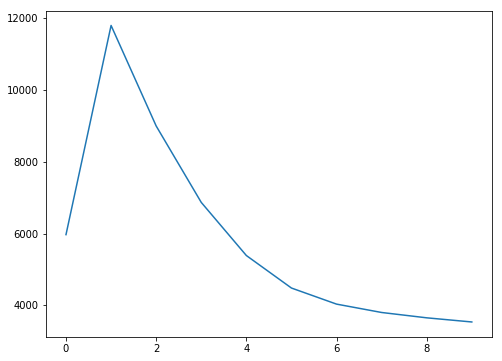

In [99]:
w = np.random.randn(D)

J = []
eta = 5e-7
epochs = 1000

for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y,p))
    w -= eta*(PHI.T.dot(p - y))
    
plt.figure(figsize = (8,6))
plt.plot(J[::100])

In [100]:
# Report Accuracy

print("Accuracy: {}".format(accuracy(y, p)))

Accuracy: 0.0


C:\Users\johnp\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [ ]:
roc_matrix = np.column_stack((p, np.round(p), y))
roc_matrix

In [ ]:
sorted_roc = roc_matrix[roc_matrix[:,0].argsort()[::-1],:]
#sorted_roc

In [ ]:
# Calc True Positive and True Negative 

tp = np.cumsum((sorted_roc[:,1] == 1) & (sorted_roc[:,2] == 1))/np.sum(sorted_roc[:,2] == 1)
tn = np.cumsum((sorted_roc[:,1] == 0) & (sorted_roc[:,2] == 0))/np.sum(sorted_roc[:,2] == 0)
fp = np.cumsum((sorted_roc[:,1] == 1) & (sorted_roc[:,2] == 0))/np.sum(sorted_roc[:,2] == 1)
fn = np.cumsum((sorted_roc[:,1] == 0) & (sorted_roc[:,2] == 1))/np.sum(sorted_roc[:,2] == 0)

In [ ]:
# adding a 0 and 1 to the array to show on the graph
tp = np.array([0] + tp.tolist() + [1])
fp = np.array([0] + fp.tolist() + [1])
               
plt.figure(figsize = (10,8))
plt.step(fp,tp)

In [ ]:
# calculates the area under the step curve which is the accuracy of the model

auc = tp[1:].dot(np.diff(fp))

In [ ]:
print("ROC/AUC: {}".format(auc))

In [ ]:
ypred = roc_matrix[:,1]
#ypred

In [75]:


TN = 0 # True Negatives: PREDICTED NO ACTUAL NO
FP = 0 # False Positives: PREDICTED YES ACTUAL NO (type 1 error)
FN = 0 # False Negatives: PREDICTED NO ACTUAL YES (type 2 error)
TP = 0 # True Positives: PREDICTED YES ACTUAL YES 


for i in range(len(ypred)): 
    if y[i]==ypred[i]==0:
        TN += 1    
    if ypred[i]==1 and y[i]!=ypred[i]:
        FP += 1    
    if ypred[i]==0 and y[i]!=ypred[i]:
        FN += 1    
    if y[i]==ypred[i]==1:
        TP += 1


print(TN, FP)
print(FN, TP)

KeyError: 0

In [76]:
w

Age                                  -1.132474
DistanceFromHome                     -0.238539
MonthlyIncome                        -0.488066
NumCompaniesWorked                    2.088019
PercentSalaryHike                     0.007760
StandardHours                         3.036562
TotalWorkingYears                    -1.439532
TrainingTimesLastYear                -2.250843
YearsAtCompany                        0.777701
YearsSinceLastPromotion               8.506088
YearsWithCurrManager                 -2.101112
totalworkhours                        9.527517
BusinessTravel_Non-Travel            -7.828624
BusinessTravel_Travel_Frequently     10.633485
BusinessTravel_Travel_Rarely         -1.012430
Department_Human Resources            7.669852
Department_Research & Development    -2.913788
Department_Sales                     -2.647280
Education_Bachelor                    0.318732
Education_Below College               1.179562
Education_College                     3.642039
Education_Doc

In [72]:
# Functions

def one_hot_encode(y): 
    N = len(y)
    K = len(set(y))
    Y = np.zeros((N,K))
    
    for i in range (N):
        Y[i, y[i]] = 1
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = np.tanh(np.matmul(X,W1) + b1)
    P = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P

def cross_entropy(Y, P):
    return -np.sum(Y*np.log(P))

def accuracy(Y,P):
    return np.mean(y == P.argmax(axis = 1))

In [73]:
# Data Prep

y.shape

(4410,)

In [74]:
# Build Model
K = 2

M1 = 4 # hyperparameter to optimize in projects

W1 = np.random.randn(D,M1)
b1 = np.random.randn(M1)
W2 = np.random.randn(M1,K)
b2 = np.random.randn(K)

In [75]:
D

71

In [76]:
# Train Model

J = []
eta = 3e-5
epochs = 2000

for epoch in range(epochs):
    Z1, P = feed_forward(PHI,W1,b1,W2,b2)
    J.append(cross_entropy(y,P))
    
    dW2 = np.matmul(Z1.T, P - y)
    db2 = (P - y).sum(axis = 0)
    W2 -= eta*dW2
    b2 -= eta*db2

    dW1 = np.matmul(PHI.T, np.matmul(P - y, W2.T)*(1 - Z1*Z1))
    db1 = (np.matmul(P - y, W2.T)*(1 - Z1*Z1)).sum(axis = 0)
    W1 -= eta*dW1
    b1 -= eta*db1
    
plt.plot(J)

ValueError: Shape of passed values is (4410, 4), indices imply (4410, 71)